# Section 1: Preprocess Excel File

In [3]:
import numpy as py
import pandas as pd

In [4]:
link = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'
df_can = pd.read_excel(link, sheet_name='Canada by Citizenship', 
                       skiprows = range(20), skipfooter =2)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [5]:
df_can.head()
df_can.tail()
df_can.info() #tart by getting basic information about your dataframe
df_can.columns.values #get the list of column headers
df_can.index.values #get the list of indicies
df_can.describe() #view a quick summary of each column in our dataframe 
df_can.isnull().sum() # check to see how many null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

## 1. What to check first 

In [6]:
print(type(df_can.columns))
print(type(df_can.index))

df_can.columns.tolist() #To get the index and columns as lists
df_can.index.tolist()

print(type(df_can.columns.tolist()))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>
<class 'list'>


In [7]:
df_can.shape # size of dataframe (rows, columns)

(195, 43)

In [8]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
                        # clean the data set to remove a few unnecessary columns
df_can.head(2) 

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


## 2. Start massage the columns and rows

In [9]:
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)
                        #rename the columns so that they make sense.
df_can.columns
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [10]:
df_can['Total'] = df_can.sum(axis = 1) # add a 'Total' column sum by row/country
                                       # automatically only sum up numerics

In [11]:
df_can.isnull().sum()
df_can.describe()
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [12]:
df_can.Country # Method 1: df.column_name (returns series)
df_can[['Country',1980, 1981, 1982, 1983, 1984, 1985]]
               # Method 2: More robust, and can filter on multiple columns.
               # df['column']  (returns series)
               # df[['column 1', 'column 2']]  (returns dataframe)



,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


## 3. How to select data

In [13]:
df_can.set_index('Country', inplace = True)  # setting a column as the index
               #df_can.index.name = None: to remove the name of the index


In [14]:
df_can.loc['Japan'] # Method 1: df.loc[label] filters by the labels of the index/column
df_can.iloc[87]     # Method 2: df.iloc[indel] filters by the labels of the index/column
df_can[df_can.index == 'Japan'].T.squeeze()
                    # Method 3: df.index

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [15]:
df_can.loc['Japan',2013]
df_can.iloc[87,36] # row + column number [[]+[]]

df_can.loc['Japan', [1980,1981, 1982, 1983, 1984, 1984]]
df_can.iloc[87,[3, 4, 5, 6, 7, 8]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

In [16]:
df_can.columns = list(map(str, df_can.columns)) # convert the colnames into str, map function
years = list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [17]:
condition = df_can['Continent'] == 'Asia' # create condition
df_can[condition]
df_can[(df_can['Continent'] == 'Asia') & (df_can['Region'] == 'Southern Asia')]

print('data dimensions:', df_can.shape)
print(df_can.columns)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


# Section 2: Matplotlib Plots (9 types)

In [18]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print('Matplotlib version:', mpl.__version__)
print(plt.style.available)
mpl.style.use(['ggplot'])

#df.plot(kind='type_plot', ...) or df.plot.type_plot(...).

Matplotlib version: 3.2.2
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## 1. Line plot

**Question: immigration from Haiti**

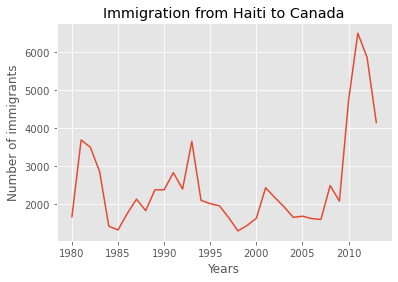

In [19]:

df_haiti = df_can.loc['Haiti', years]
df_haiti.head(2)

df_haiti.index = df_haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
df_haiti.plot(kind = 'line')

plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.title('Immigration from Haiti to Canada')

plt.show() # need this line to show the updates made to the figure

**Question: compare the number of immigrants from India and China from 1980 to 2013.**

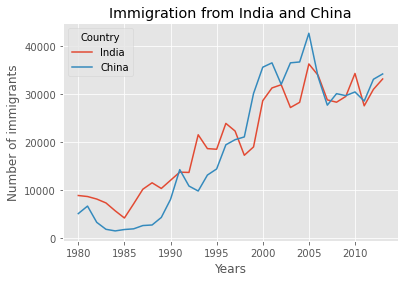

In [20]:

df_ic = df_can.loc[['India','China'], years]
df_ic.head(2)

#df_ic.T.index = df_ic.T.index.map(int) 
df_ic.T.plot(kind='line')


plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.title('Immigration from India and China')

plt.show() # need this line to show the updates made to the figure


## 2. Area/Stacked line plot

**Question: visualized the top 5 countries.**

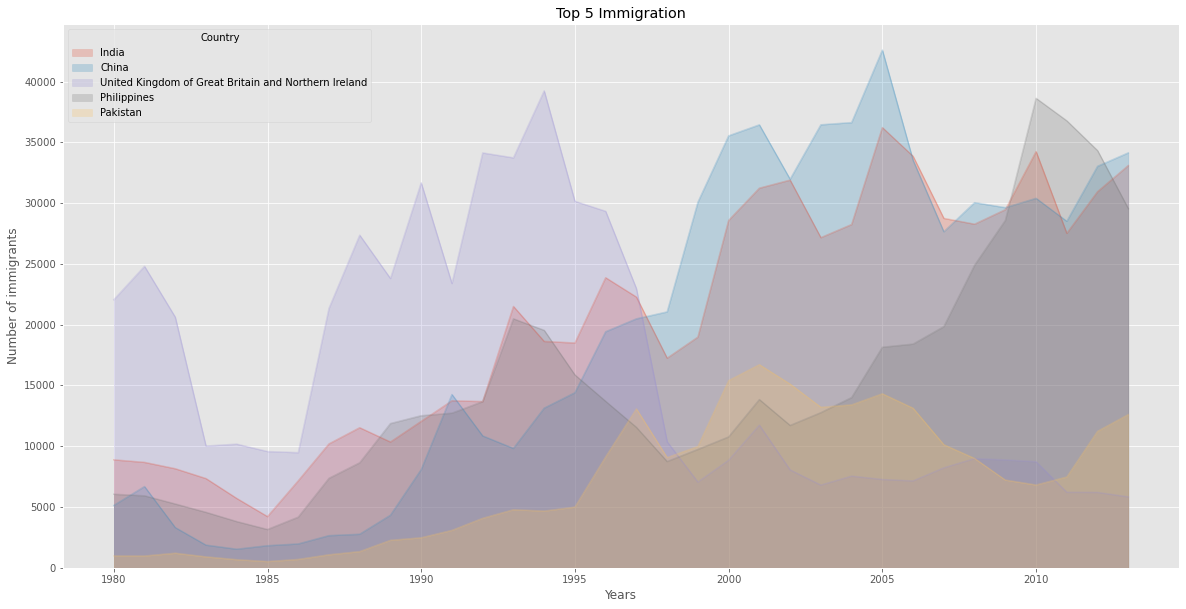

In [21]:

df_can['Total'] = df_can[years].sum(axis = 1)
df_top5 = df_can.sort_values(['Total'], ascending = False,  axis = 0)
df_top5 = df_top5.head(5)



df_top5 = df_top5[years].T
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind = 'area', stacked=False, alpha=0.25, figsize=(20, 10))


plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.title('Top 5 Immigration')

plt.show() # need this line to show the updates made to the figure


**Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.** 

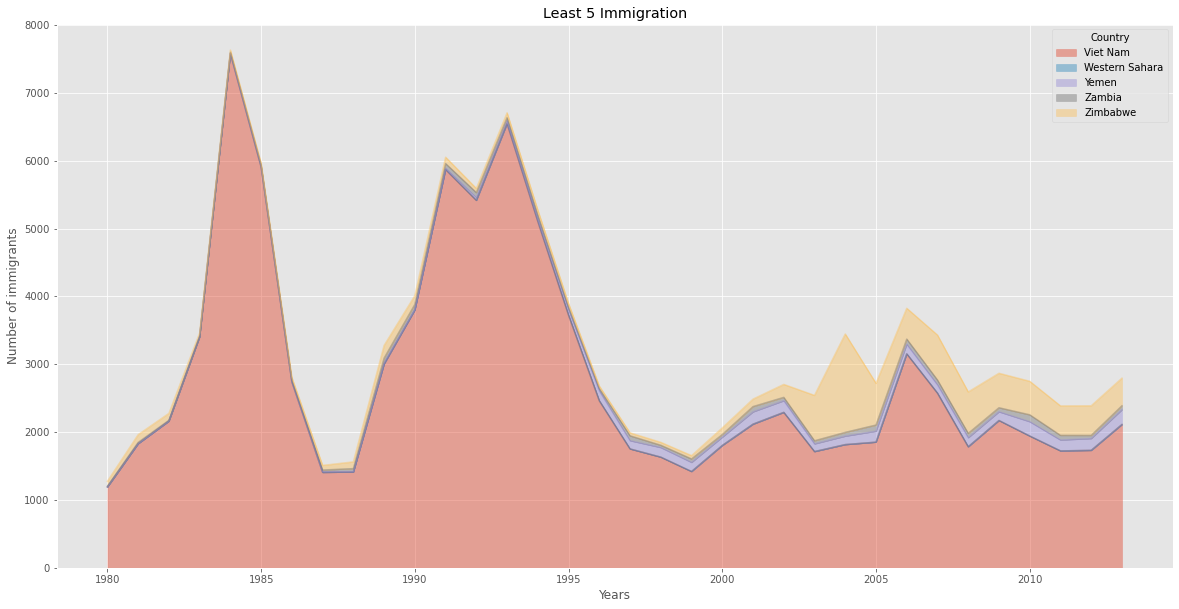

In [22]:

df_tail5 = df_can.tail(5)

df_tail5 = df_tail5[years].T
df_tail5.index = df_tail5.index.map(int)

df_tail5.plot(kind = 'area', stacked=True, alpha=0.45, figsize=(20, 10))

plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.title('Least 5 Immigration')

plt.show() # need this line to show the updates made to the figure


**Another way of plotting:**

Text(0.5, 1.0, 'Least 5 Immigration')

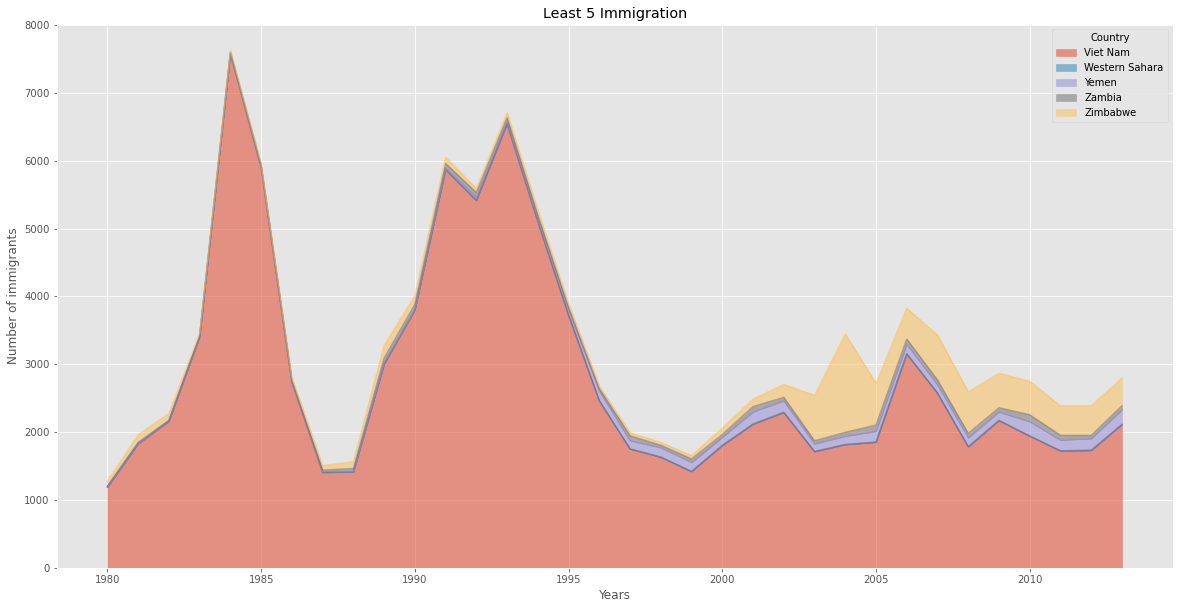

In [23]:
ax = df_tail5.plot(kind = 'area', stacked=True, alpha=0.55, figsize=(20, 10))
ax.set_xlabel('Years')
ax.set_ylabel('Number of immigrants')
ax.set_title('Least 5 Immigration')


## 3. Histogram

**Question: 2013 immigration distribution of countries**

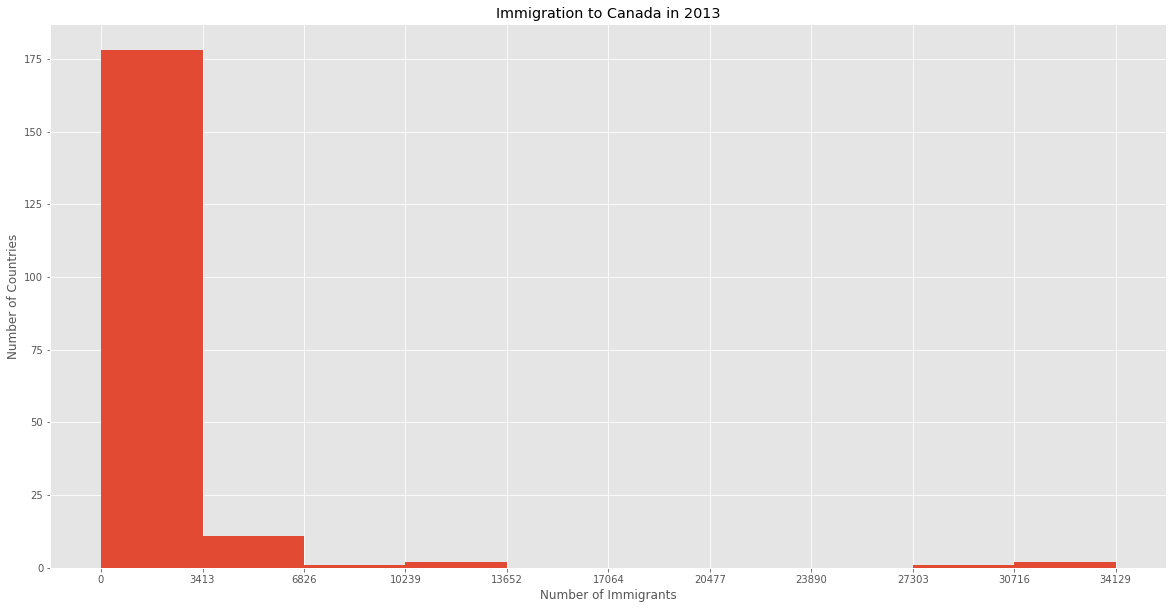

In [24]:
df_13 = df_can['2013']

counts, edges = np.histogram(df_13)

df_13.plot(kind='hist', xticks = edges, figsize=(20, 10))

plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.title('Immigration to Canada in 2013')
plt.show()

**Question: immigration for Denmark, Norway, and Sweden 1980 - 2013**

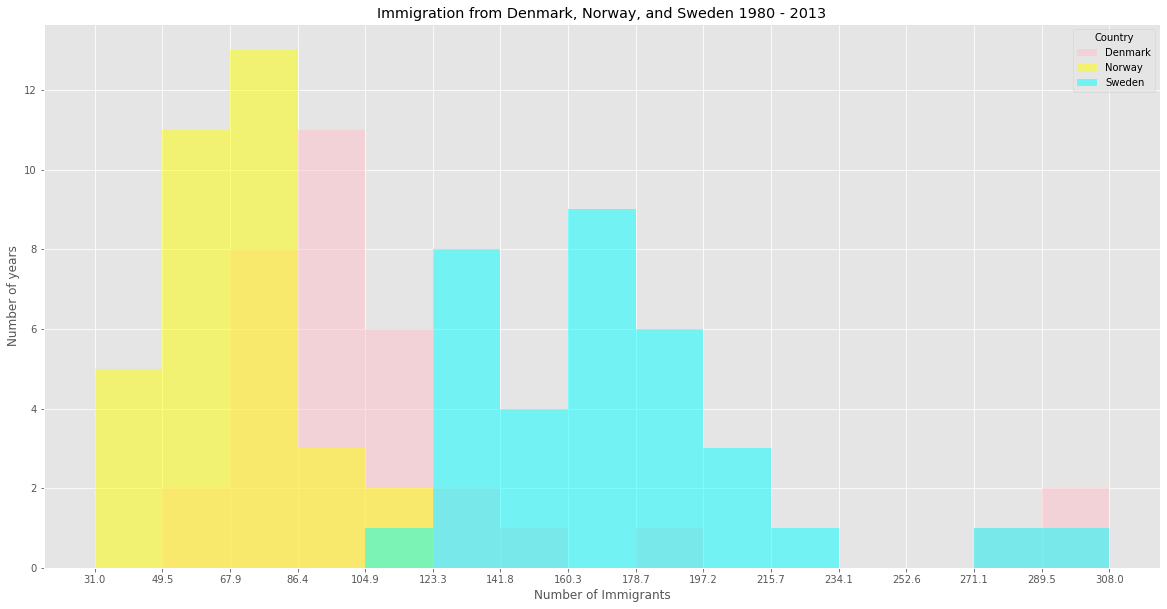

In [25]:
df_dns = df_can.loc[['Denmark','Norway','Sweden'], years]
df_dns = df_dns.T

counts, edges = np.histogram(df_dns, 15)

df_dns.plot(kind = 'hist', alpha = 0.5, bins = 15, xticks = edges, figsize=(20, 10),
                color = ['pink','yellow','cyan'])
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of years')
plt.title('Immigration from Denmark, Norway, and Sweden 1980 - 2013')
plt.show()

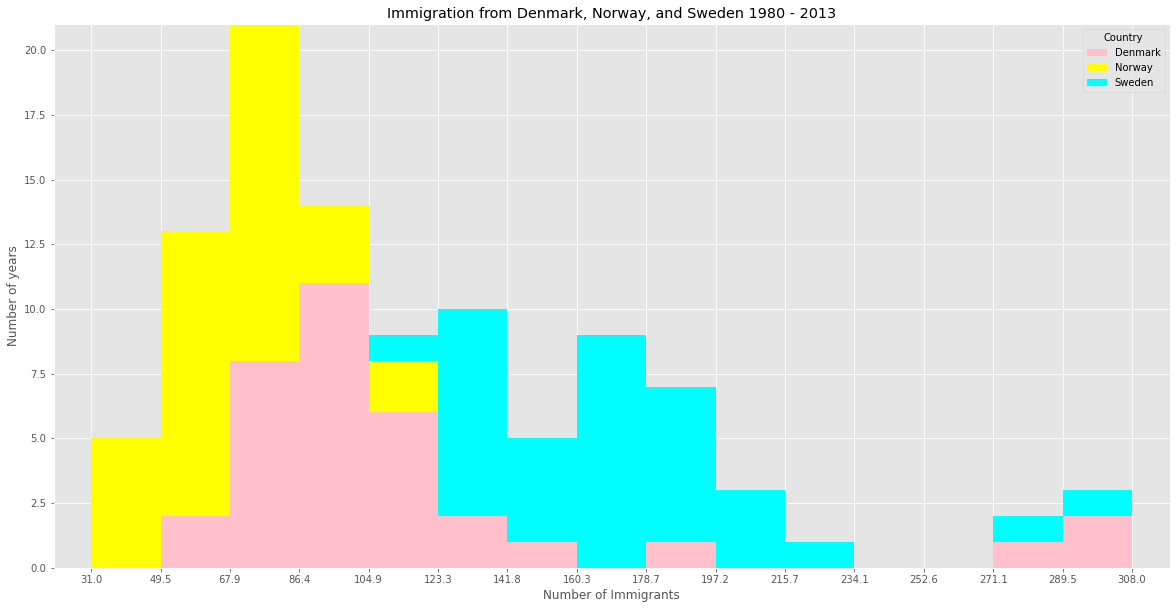

In [26]:
# Not overplotting - stack = True instead of alpha parameter

df_dns.plot(kind = 'hist', bins = 15, xticks = edges, figsize=(20, 10), 
            stacked = True,
            color = ['pink','yellow','cyan'])
plt.xlim(edges[0]-10, edges[-1]+10)


plt.xlabel('Number of Immigrants')
plt.ylabel('Number of years')
plt.title('Immigration from Denmark, Norway, and Sweden 1980 - 2013')
plt.show()

## 4. Bar plot

In [27]:
# bar / barh

**Question: number of Icelandic immigrants 1980 to 2013 with annotae**

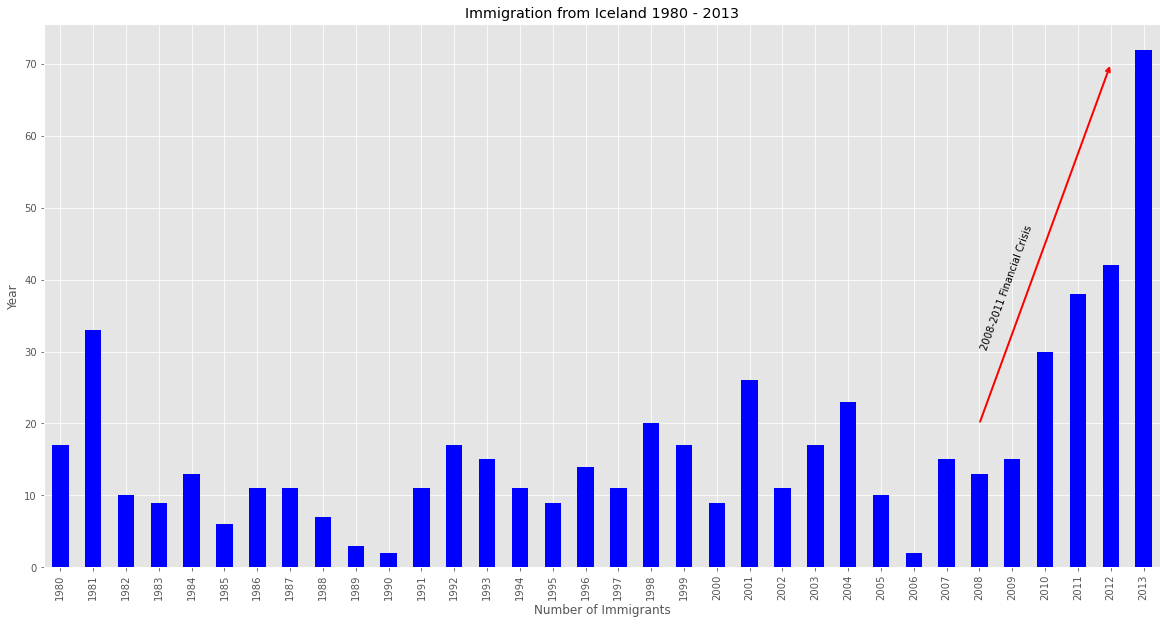

In [28]:
df_ice = df_can.loc["Iceland",years]

df_ice.plot(kind = 'bar',figsize=(20,10),color = 'blue')

plt.xlabel('Number of Immigrants')
plt.ylabel('Year')
plt.title('Immigration from Iceland 1980 - 2013')

plt.annotate('', xy=(32,70), xytext=(28, 20), xycoords='data',
            arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color = 'r',lw=2))
            # blank string at base, head, base, use the coordinate system of the object being annotated 

plt.annotate('2008-2011 Financial Crisis', xy=(28,30), 
             rotation = 70, va='bottom',ha='left')
            # String, starting point, angle, vertically 'bottom' aligned, horizontally 'left' algned
    

plt.show()

**Question: top 15 countries total number of immigrants 1980 - 2013 with total count label.**

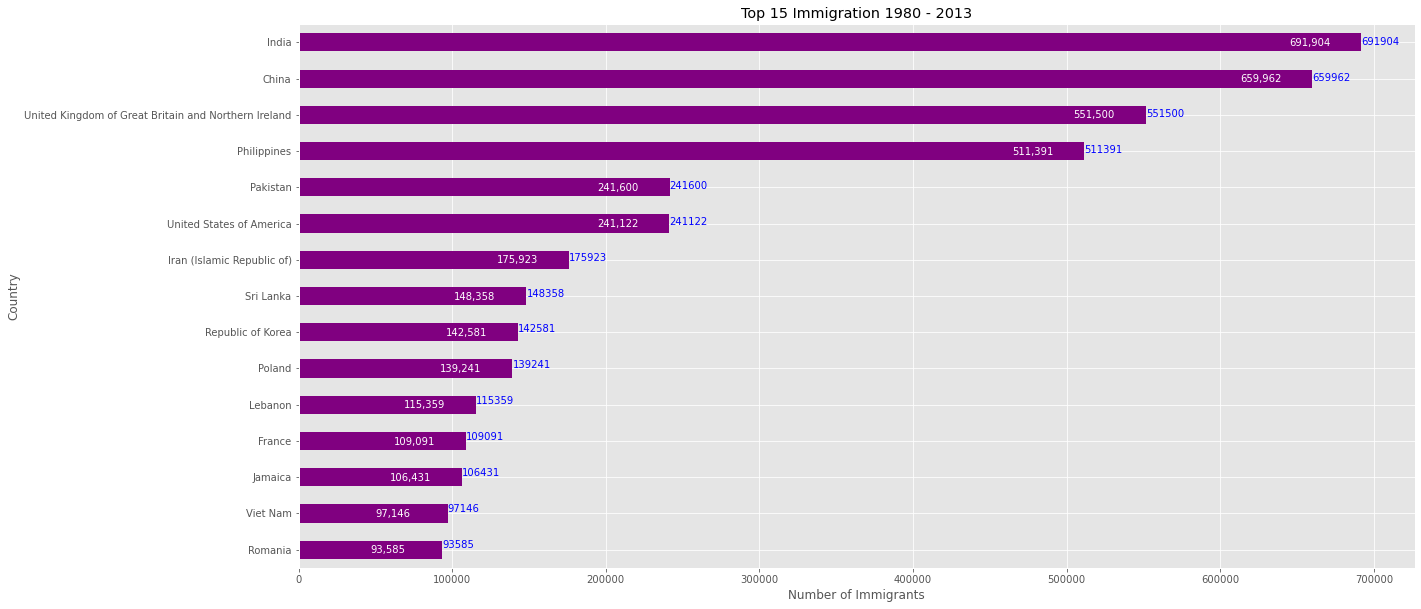

In [29]:
df_top15 = df_can.sort_values(by='Total',ascending = True).tail(15)

df_top15['Total'].plot(kind = 'barh', color = 'purple', figsize=(20,10))

plt.xlabel('Number of Immigrants')
plt.ylabel('Country')
plt.title('Top 15 Immigration 1980 - 2013')

for i in range(0, df_top15.shape[0]):
    plt.annotate(df_top15['Total'][i], xy=(df_top15['Total'][i], i*0.99), color = 'blue',
                 rotation = 0, va='bottom',ha='left')
            # String, starting point, angle, vertically 'bottom' aligned, horizontally 'left' algned

for index, value in enumerate(df_top15['Total']): 
    label = format(int(value), ',') # format int with commas    
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')


plt.show()

## 5. Pie chart

**Question: proportion (percentage) grouped by continents in 1980 - 2013.**

[0.1, 0.1, 0.1, 0, 0, 0]


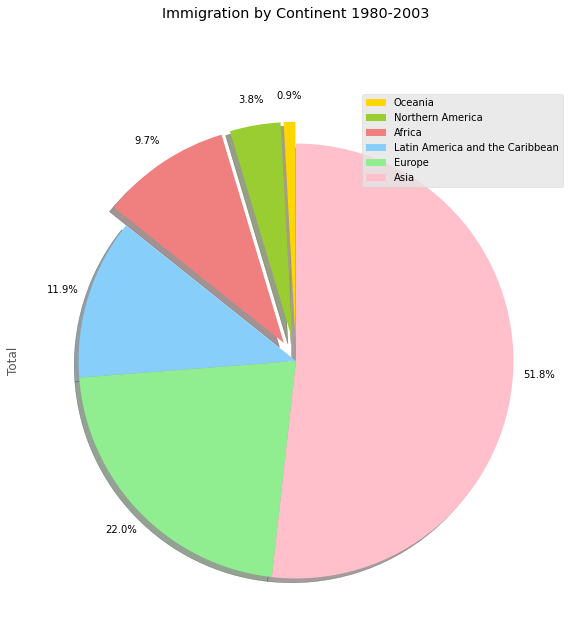

In [30]:
# Group + calculation + plot
# groupby + .sum(),.count(),.mean(),.std(),.aggregate(),.apply() + combine groups

df_cont = df_can.groupby('Continent',axis = 0).sum()

df_cont.sort_values(by='Total',ascending=True, inplace=True)

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1]*3 + [0]*(df_cont.shape[0]-3)  # explode/offset lowest 3 groups

print(explode_list)
df_cont['Total'].plot(kind='pie', figsize=(20,10),
                      autopct = '%1.1f%%', #autopct:  label the wedges with their numeric value 'fmt%pct';
                      startangle = 90,     #startangle: rotates the start counterclockwise from the x-axis.
                      shadow = True,
                      labels=None,         # turn off labels on pie chart
                      pctdistance=1.12,    # location of the percentage notation
                      colors=colors_list,  # add custom colors
                      explode=explode_list # explode part of the pie
) 

plt.title('Immigration by Continent 1980-2003', y=1.12) # scale the title 1.12
plt.legend(labels=df_cont.index, loc='upper right') # create labels as row index
plt.show()


**Question: group by continent in 2013**



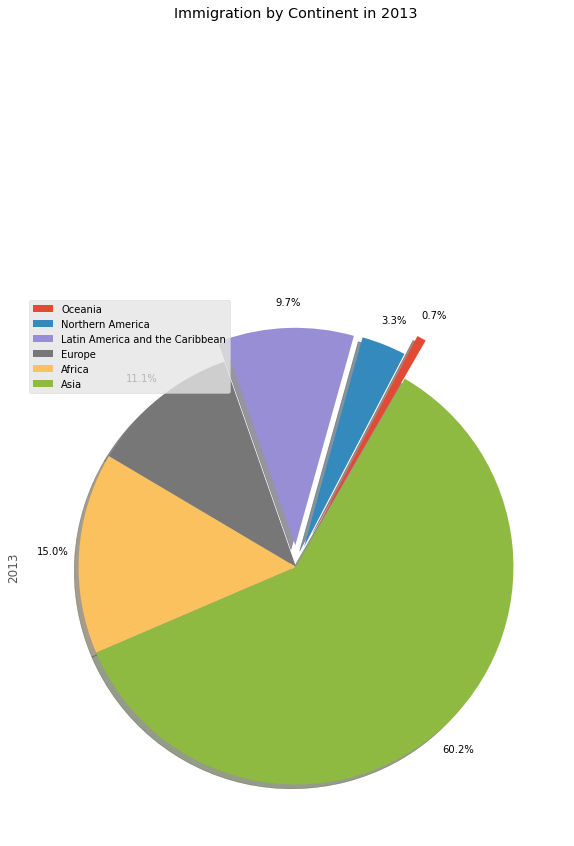

In [31]:
df_cont = df_can.groupby('Continent', axis = 0).sum()
df_cont13 = df_cont['2013'].sort_values(ascending = True)

explode_fix = [0.2]+[0.1]*2 + [0]*(df_cont13.shape[0]-3)

df_cont13.plot(kind = 'pie', figsize = (20,10),
               autopct = '%1.1f%%',
               startangle = 60,
               shadow = True,
               labels= None,
               pctdistance =1.12,
               explode = explode_fix)


plt.title('Immigration by Continent in 2013', y=1.5)
plt.legend(labels = df_cont13.index, loc='upper left')
plt.show()





## 6. Box plot

**Question: Immigration from Japan in 1980-2013** 

count       34
unique      34
top       1214
freq         1
Name: Japan, dtype: int64

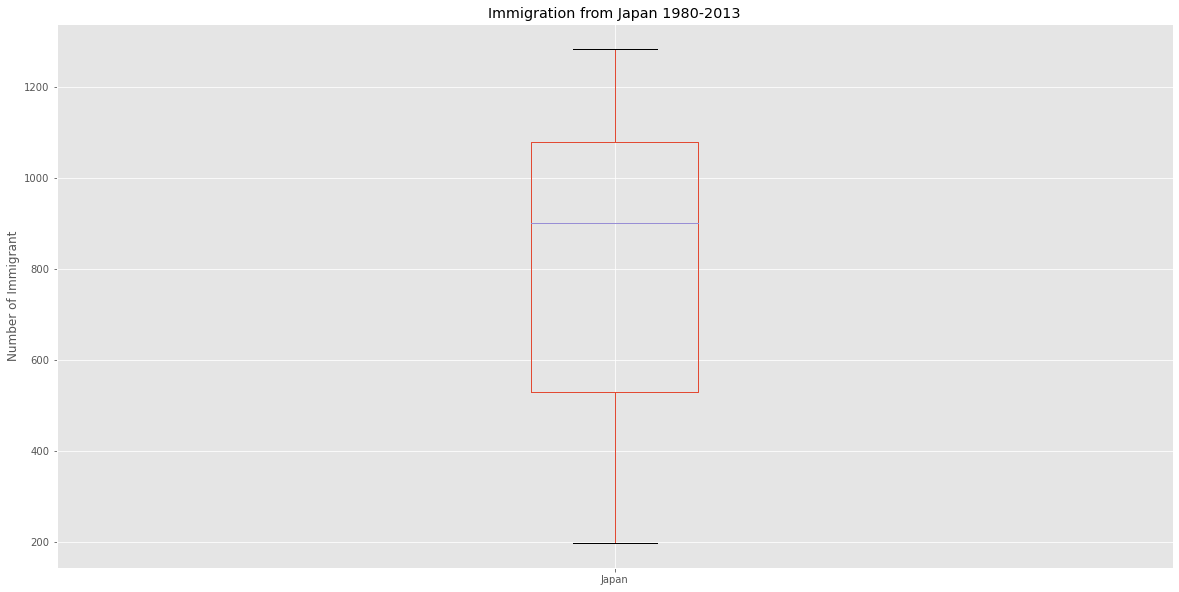

In [32]:
df_jp = df_can.loc['Japan', years]

df_jp.plot(kind = 'box', figsize=(20,10))

plt.ylabel('Number of Immigrant')
plt.title('Immigration from Japan 1980-2013')
plt.show

df_jp.describe()  # check what is in box plot

**Question: Compare immigrants from India and China 1980 - 2013** 

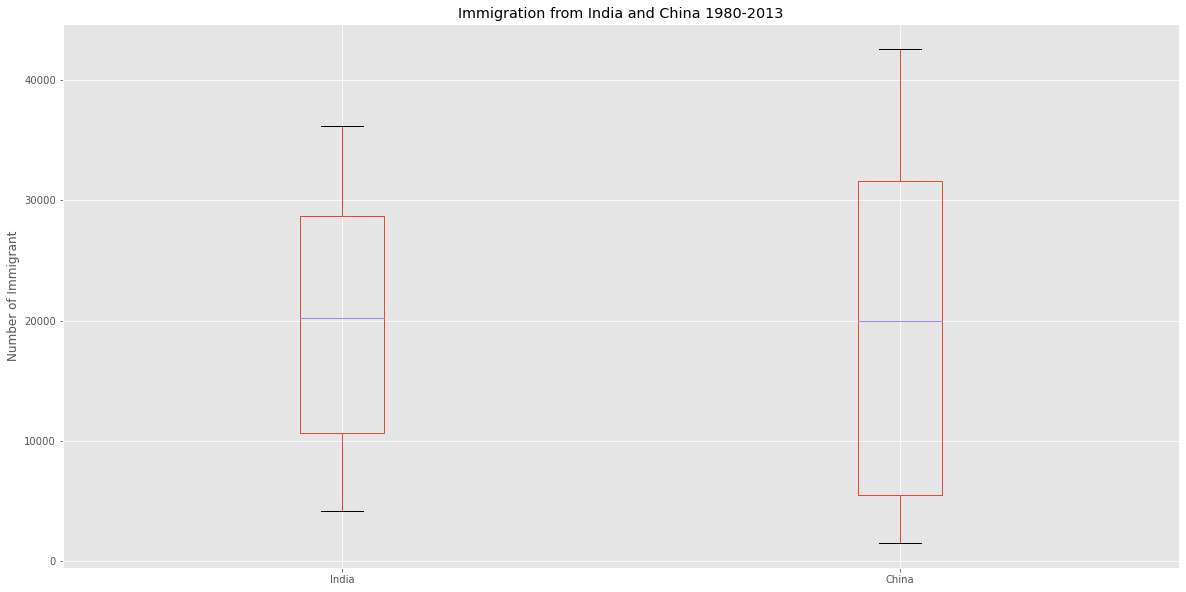

In [33]:

#df_ic.describe()

df_ic = df_ic.T
df_ic.plot(kind='box', figsize = (20,10))

plt.ylabel('Number of Immigrant')
plt.title('Immigration from India and China 1980-2013')

plt.show()

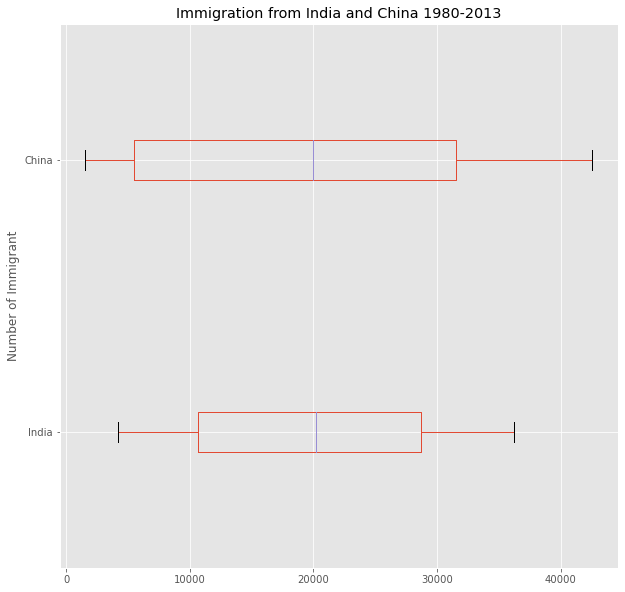

In [34]:
# verticel box plot
df_ic.plot(kind='box', figsize = (10,10), vert = False)

plt.ylabel('Number of Immigrant')
plt.title('Immigration from India and China 1980-2013')

plt.show()


## 7. Scatter plot

**Question: Trend of total immigration 1980-2013**

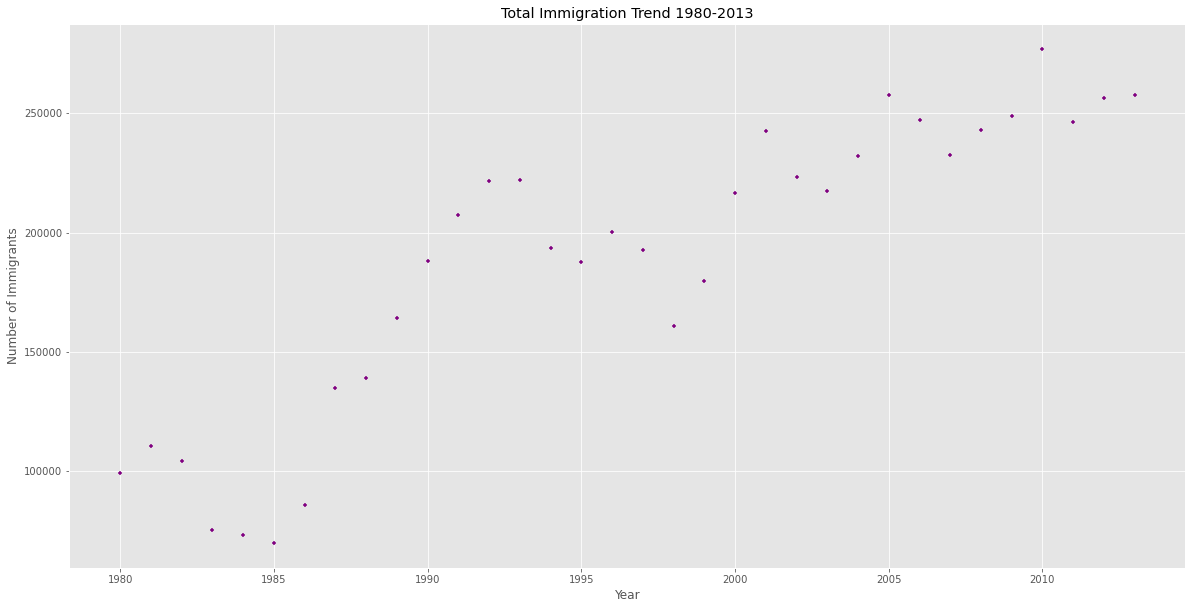

In [35]:
# 0. Calculate selected data
df_tot = df_can[years].sum(axis = 0)

# 1. Need to change series to dataframe
df_tot = pd.DataFrame(df_tot)  # After calculation, this is a series not a df

# 2. Need to reset index, otherwise it is not recoginzed as a column
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)

# 3. Add column names
df_tot.columns = ['year','total']

df_tot.plot(kind= 'scatter', figsize=(20,10),
           x = 'year', y = 'total',
           marker='+', color = 'purple')

plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Total Immigration Trend 1980-2013")
plt.show()

### Predict immigration in 2015

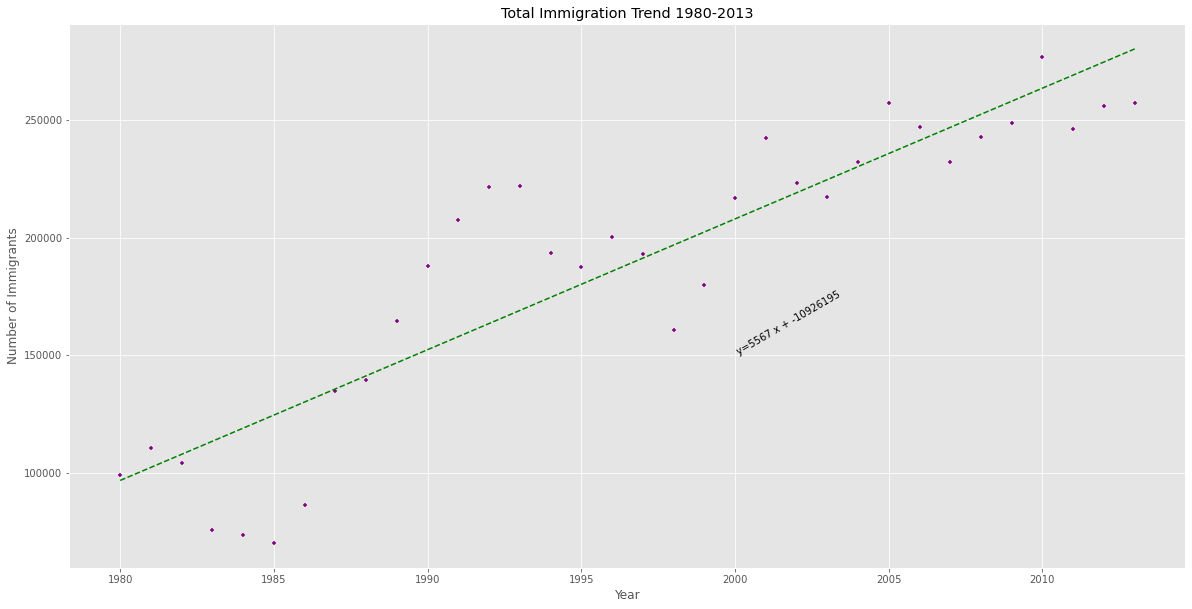

In [36]:
# Create a linear fit
x = df_tot['year']
y = df_tot['total']

fit = np.polyfit(x, y, deg = 1)


# Normal stuff
df_tot.plot(kind= 'scatter', figsize=(20,10),
           x = 'year', y = 'total',
           marker='+', color = 'purple')


plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Total Immigration Trend 1980-2013")

# Plot regression 
plt.plot(x, fit[0]*x + fit[1], '--', color = "green")

plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]),
             xy=(2000, 150000), rotation = 30)
plt.show()


**Question: Total immigration from Denmark, Norway, Sweden 1980-2013**

In [37]:
# Follow Step 0-4 like above
df_dns_tot = df_dns.sum(axis = 1)
df_dns_tot = pd.DataFrame(df_dns_tot)

df_dns_tot.index = map(int, df_dns_tot.index)
df_dns_tot.reset_index(inplace = True)

df_dns_tot.columns = ['year','total']


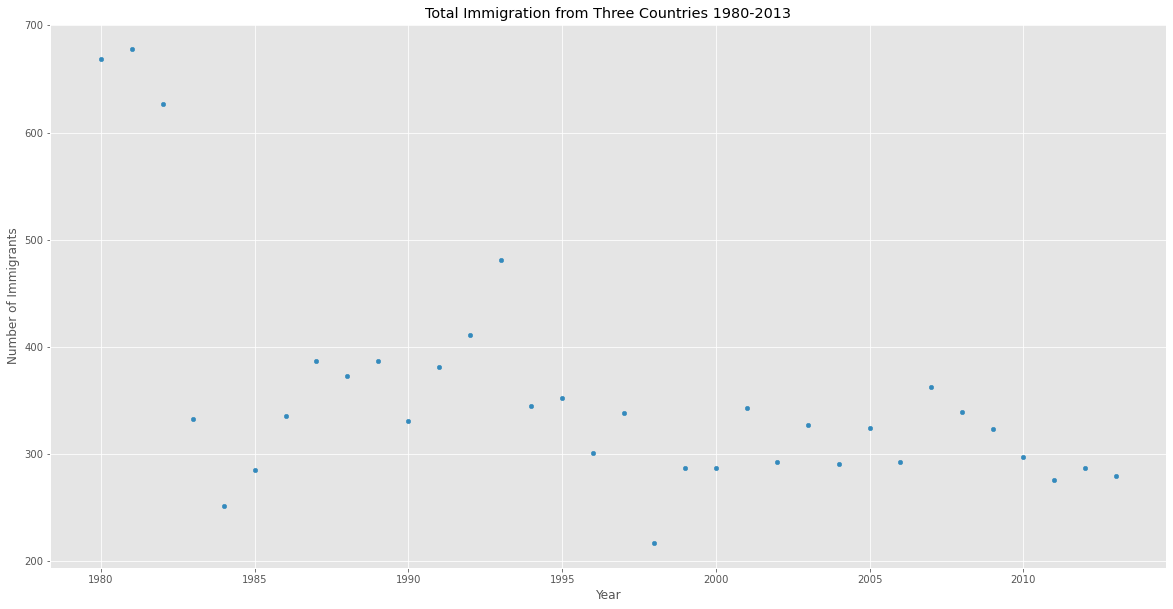

In [38]:
df_dns_tot.plot(kind='scatter', figsize=(20,10),
           x = 'year', y = 'total')

plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Total Immigration from Three Countries 1980-2013")


plt.show()


## 8. Bubble plot (3D scatter plot)

### Step1: Create subset (notice row/index reset and column rename)

In [39]:
df_ab = df_can.loc[['Brazil','Argentina'], years]
df_ab = df_ab.T

df_ab.index = map(int, df_ab.index) # add index column here again
df_ab.reset_index(inplace = True)

df_ab.columns = ['year','Brazil','Argentina'] # if too many, use tolist command

df_ab.head(10)


,year,Brazil,Argentina
0,1980,211,368
1,1981,220,426
2,1982,192,626
3,1983,139,241
4,1984,145,237
5,1985,130,196
6,1986,205,213
7,1987,244,519
8,1988,394,374
9,1989,650,538


### Step2: Normalization for bubble size

In [40]:
norm_bra = (df_ab['Brazil'] - df_ab['Brazil'].mean()) / (df_ab['Brazil'].max()- df_ab['Brazil'].min())
norm_arg = (df_ab['Argentina'] - df_ab['Argentina'].mean()) / (df_ab['Argentina'].max()- df_ab['Argentina'].min())

### Step3: Plot with 2 axes

/Users/yan/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


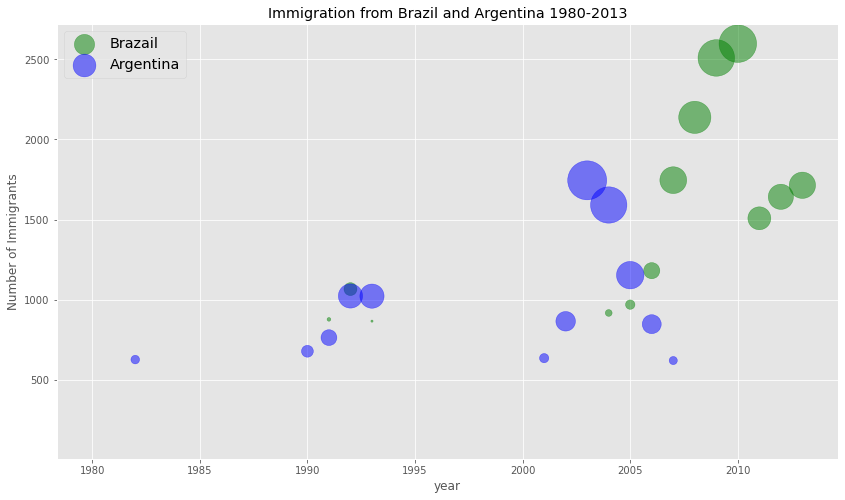

In [41]:
ax_bra = df_ab.plot(kind = 'scatter', figsize = (14,8), x='year', y = 'Brazil',
                   alpha = 0.5, color = 'green', 
                   s = norm_bra *2000 +10)

ax_arg = df_ab.plot(kind = 'scatter', x='year', y = 'Argentina',
                   alpha = 0.5, color = 'blue', 
                   s = norm_arg *2000 +10,
                   ax = ax_bra)    # use the first ax

ax_bra.set_ylabel('Number of Immigrants')
ax_bra.set_title('Immigration from Brazil and Argentina 1980-2013')
ax_bra.legend(['Brazail','Argentina'], loc='upper left',
             fontsize = 'x-large')


**Question: compare immigrants from India and China 1980-2013**

In [42]:
# reset index
df_ic.index = map(int, df_ic.index)
df_ic.reset_index(inplace=True)

In [43]:
# reset columns and normalization
df_ic.columns = ['year','India','China']

norm_ind = (df_ic['India'] - df_ic['India'].mean()) / (df_ic['India'].max() - df_ic['India'].min())
norm_chi = (df_ic['China'] - df_ic['China'].mean()) / (df_ic['China'].max() - df_ic['China'].min())

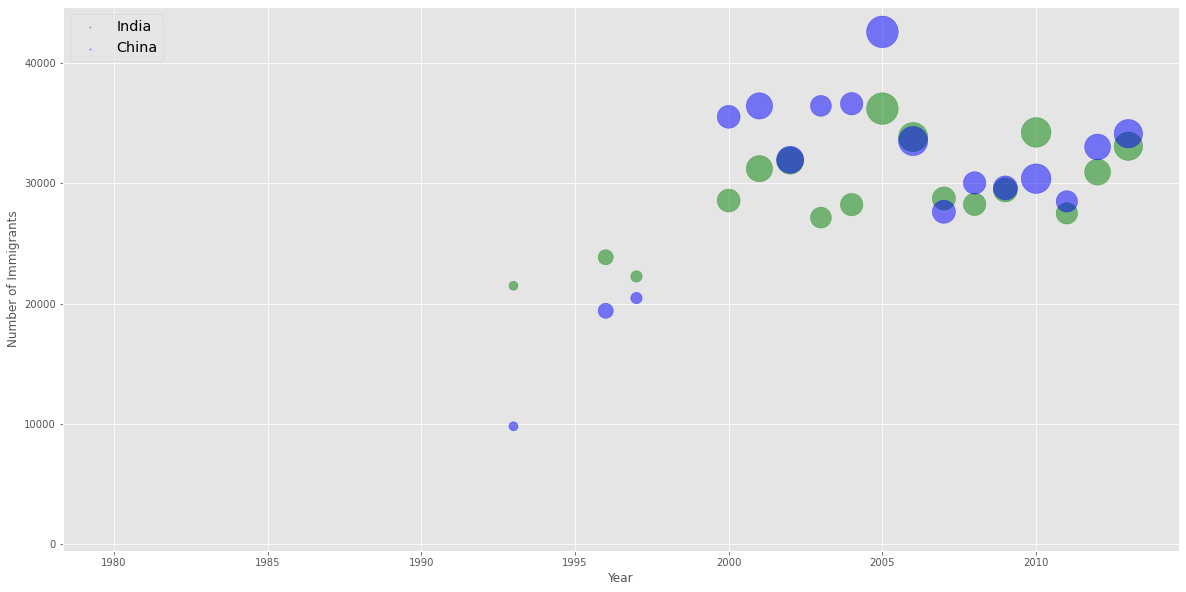

In [44]:
# plot
ax_ind = df_ic.plot(kind = 'scatter', figsize = (20,10),
                    x= 'year', y='India', alpha = 0.5,
                   color = 'green', 
                   s = norm_ind *2000 + 10)

ax_chi = df_ic.plot(kind = 'scatter', 
                    x= 'year', y='China', alpha = 0.5,
                   color = 'blue', 
                   s = norm_ind *2000 + 10,
                   ax = ax_ind)

ax_ind.set_xlabel('Year')
ax_ind.set_ylabel('Number of Immigrants')

ax_ind. legend(['India','China'], loc='upper left', fontsize = 'x-large')

## 9. Subplot

In [45]:
#fig = plt.figure()
#ax = fig.add_subplot(111)  # nrow, ncol, plot_index 1, 2
#                                                    3, 4

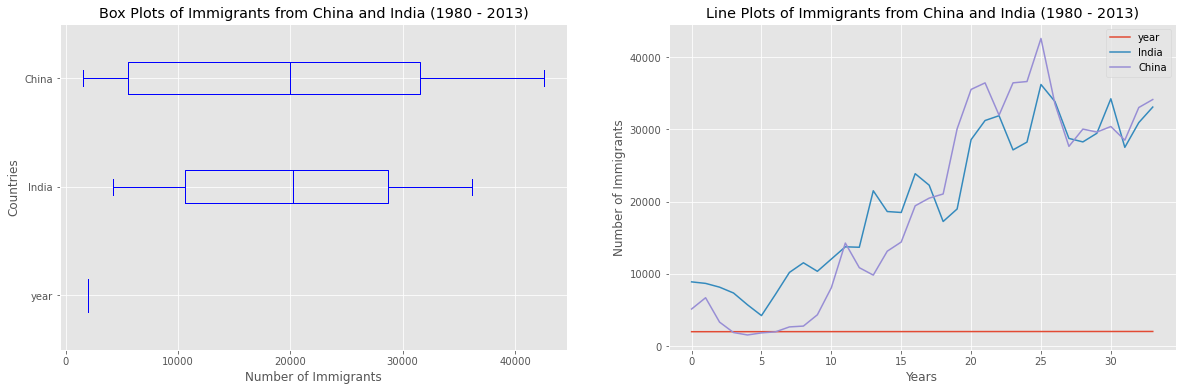

In [46]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_ic.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_ic.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Question: box plot

In [47]:
df_top15 = df_can.sort_values(by ='Total',ascending = False).head(15)
df_top15 = df_top15[years]


In [48]:
# Create lists of decades and split

years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

df_80 = df_top15[years_80s].sum(axis = 1).T
df_90 = df_top15[years_90s].sum(axis = 1).T
df_00 = df_top15[years_00s].sum(axis = 1).T


In [49]:
# Combine all groups
df_new15 = pd.DataFrame(df_80)

df_new15.columns=['80s']

df_new15['90s']= df_90
df_new15['00s']= df_00

#df_new = pd.DataFrame({'80s': df_80}, {'90s': df_90}, ,{'00s': df_00})
#df_new.head()

In [50]:
df_new15.describe()

,80s,90s,00s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


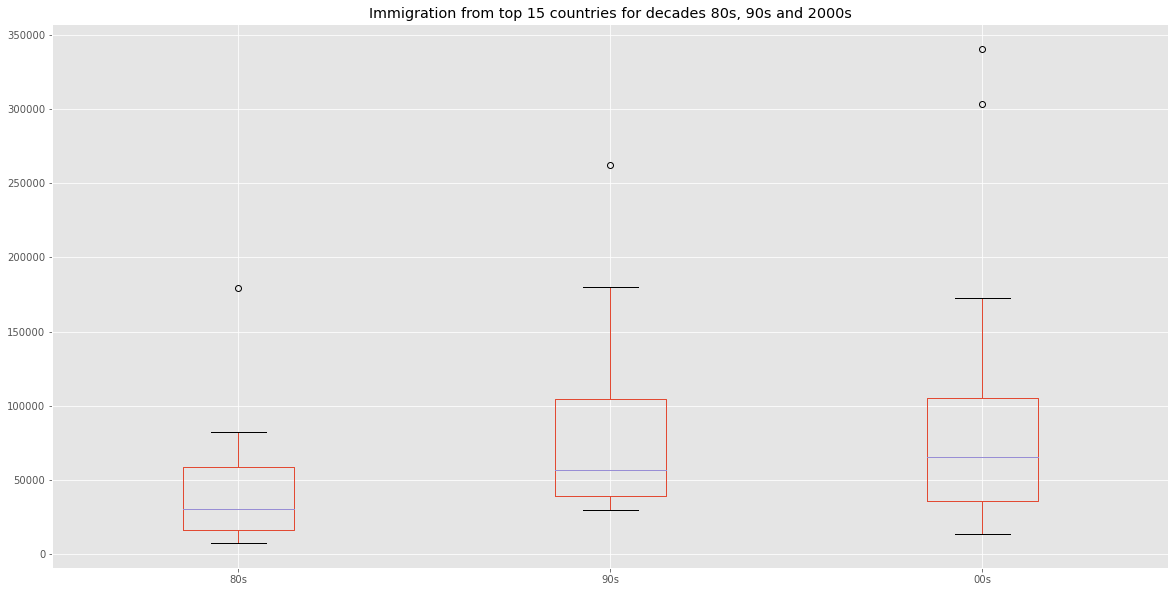

,80s,90s,00s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


In [51]:
df_new15.plot(kind = 'box',figsize=(20,10))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

df_new15[df_new15['00s']> (105505.5 + 1.5*(105505.5 -36101.5))]
                # check outliers: 75% + 1.5 * (75% - 25%)

# Section 3: Self-Defined & Seaborn

## 1. Waffle plot

In [54]:
# maybe use PyWaffle package in the future
# Step 0: preprocss
from PIL import Image
import matplotlib.patches as mpatches

df_dsn = df_can.loc[['Denmark','Norway','Sweden'],:]

### Step1: determing the proportion of each category to total

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744
Total number of tiles is  400
Denmark:129.0
Norway:77.0
Sweden:194.0
Waffle chart populated!


<Figure size 432x288 with 0 Axes>

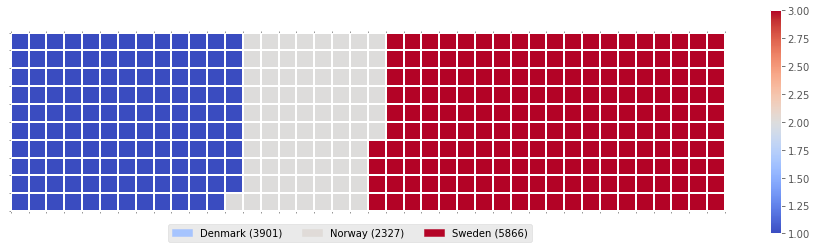

In [55]:

total = sum(df_dsn['Total'])
proportion = df_dsn['Total'] / total

for i, p in enumerate(proportion):
    print(df_dsn.index.values[i] + ':' + str(p))



### Step2: overall size of waffle / number of tiles

In [ ]:

width = 40
height = 10
total_num= width*height
print ('Total number of tiles is ', total_num)



### Step3: how many tiles in each category

In [ ]:

cat_num = round(total_num * proportion)

for i, p in enumerate(cat_num):
    print(df_dsn.index.values[i] + ':' + str(p))
    


### Step4: create a matrix resemble waffle

In [59]:

waffle_chart = np.zeros((height, width))
cat_ind = 0
tile_ind = 0

            # The goal is to be able to index tiles as category
            # aka make first tiles as first category number, then change with category

for col in range(width):
    for row in range(height):
        tile_ind += 1
        
        if tile_ind > sum(cat_num[0:cat_ind]):
            cat_ind += 1
        
        waffle_chart[row, col] = cat_ind

print('Waffle chart populated!')



### Step 5: Visualize matrix

In [ ]:

fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-0.5, width, 1), minor = True)
ax.set_yticks(np.arange(-0.5, height, 1), minor = True)

ax.grid(which='minor', color = 'w', linestyle='-', linewidth =2) #add gridlines based on minor ticks

plt.xticks([])
plt.yticks([])



### Step6: Add legends

In [ ]:

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = [] # add legend to chart
for i, p in enumerate(df_dsn.index.values):
    label_str = p + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))


plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

**Question: Make a function called create_waffle_chart**

In [ ]:
def create_waffle_chart()
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

## 2. Word Clouds

In [64]:
#!conda install -c conda-forge wordcloud --yes
from wordcloud import WordCloud, STOPWORDS


Solving environment: done

## Package Plan ##

  environment location: /Users/yan/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py38h32f6830_2         3.0 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    wordcloud-1.7.0            |   py38h64e0658_1         174 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.8-1_cp38
  wordcloud          conda-forge/osx-64::wordcloud-1.7.0-py38h64e0658_1

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py38_0 --> conda-forge::conda-4.8.4-py38h32f6830_2



wordcloud-1.7.0      | 1

### Generate normal word cloud with new stopwords

In [66]:
# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()

stopwords = set(STOPWORDS)

# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# add the words said to stopwords
stopwords.add('said') 

# re-generate the word cloud
alice_wc.generate(alice_novel)

# re-display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

zsh:1: command not found: wget


FileNotFoundError: [Errno 2] No such file or directory: 'alice_novel.txt'

### Generate word cloud in a shape/mask

In [ ]:
# download image
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Question: use word cloud to see immigration distribution**

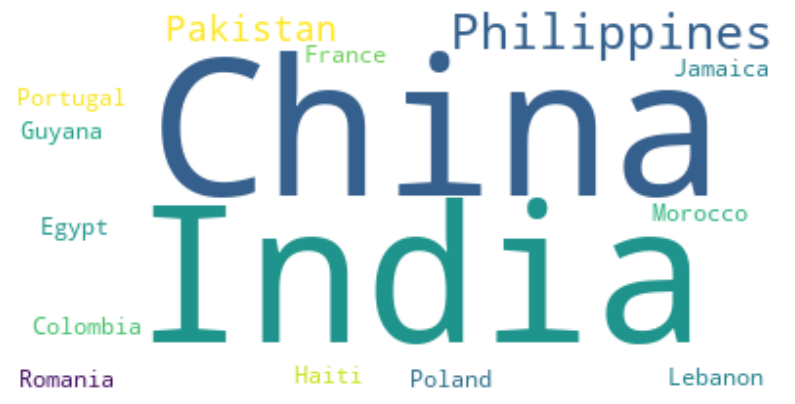

In [67]:
total_immigration = df_can['Total'].sum()

# Using countries with single-word names
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. Seaborn: Regression

In [57]:
import seaborn as sns

df_tot = df_can[years].sum(axis =0)
df_tot = pd.DataFrame(df_tot)       # just like before, after calculation this is a Series 

df_tot.index = map(float, df_tot.index) # need to reset rows/index and change column names
df_tot.reset_index(inplace = True)
df_tot.columns = ['year','total']
df_tot.head(2)

,year,total
0,1980.0,99137
1,1981.0,110563


### Seaborn plot settings with plt & sns

[Text(0, 0.5, 'Number of Immigration'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Total Immigration 1980-2013')]

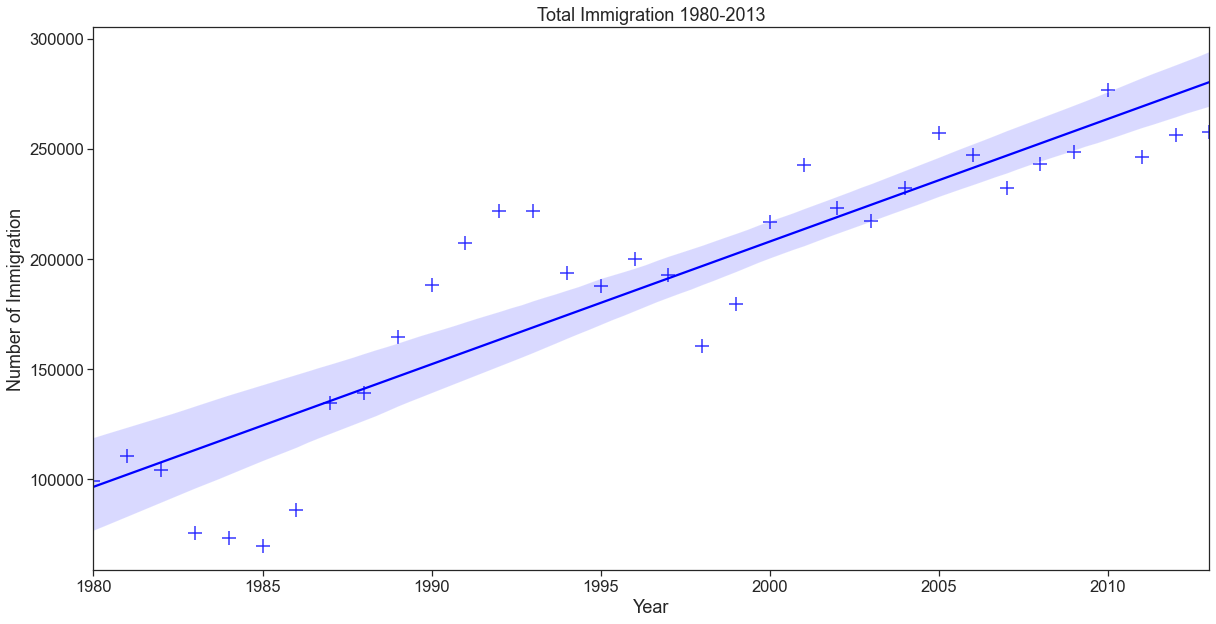

In [62]:
plt.figure(figsize=(20,10)) # change setting,increase font size
sns.set(font_scale = 1.5)
sns.set_style('ticks')     # change background to white background
#sns.set_style('whitegrid') # or to a white background with gridlines.

ax = sns.regplot(x='year',y='total',data=df_tot, color = 'blue', marker = '+',
                scatter_kws = {'s': 200}) # set scattering


ax.set(xlabel='Year', ylabel='Number of Immigration', title='Total Immigration 1980-2013') # like ax.set_xlabel
